## 머신러닝 알고리즘을 훈련하기 위한 주요 단계 
#### 1. 특성을 선택하고 훈련샘플을 모으기 
#### 2. 성능지표 선택
#### 3. 분류 모델과 최적화 알고리즘을 선택
#### 4. 모델의 성능을 평가 
#### 5. 알고리즘을 튜닝

### 1. 폴더에서 사진고르고 색 추출 후 표에 저장

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def extract_central_rgb(image_path):
    image = Image.open(image_path)
    width, height = image.size
    central_pixel = image.getpixel((width // 2, height // 2))
    return central_pixel

def load_images_from_folder(folder_path,keyword):
    image_paths = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') and filename.startswith(keyword):
            image_paths.append(os.path.join(folder_path, filename))
    return image_paths

keyword ='fixed'
folder_path = "C:/Users/USER/Desktop/pH/fixed/total1"
image_paths = load_images_from_folder(folder_path,keyword)

data = []

for image_path in image_paths:
    judge_value = 'error'
    # 이미지 파일 제목에서 pH 추출
    pH_value = os.path.splitext(os.path.basename(image_path))[0].split('_')[2]
    if (4.8<=float(pH_value)<=5.6):
        judge_value = 'danger'
    elif (5.7<=float(pH_value)<=6.0):
        judge_value = 'warning'
    elif (6.1<=float(pH_value)<=6.4):
        judge_value = 'safe'
        
    # 중앙 부분의 RGB 값을 추출
    rgb = extract_central_rgb(image_path)
    
    # 튜플로 데이터 생성
    image_data = (judge_value, pH_value, rgb[0], rgb[1], rgb[2])
    
    # 데이터 추가
    data.append(image_data)

# Extracting data for plotting
judge_values = [item[0] for item in data]
pH_values = [item[1] for item in data]
R_values = [item[2] for item in data]
G_values = [item[3] for item in data]
B_values = [item[4] for item in data]

for item in data:
    print(f"judge:{item[0]}, pH:{item[1]} - R:{item[2]}, G:{item[3]}, B:{item[4]}")
    
#data dataframe로 저장    
df = pd.DataFrame(data, columns=['judge','pH', 'R', 'G', 'B'])

# DataFrame을 Excel 파일로 저장
excel_filename = 'output_data.csv'
#df.to_excel(excel_filename, index=False)
df.to_csv(excel_filename, index=False)


judge:error, pH:4.0 - R:117, G:119, B:79
judge:error, pH:4.0 - R:113, G:121, B:82
judge:error, pH:4.0 - R:110, G:112, B:75
judge:error, pH:4.0 - R:112, G:121, B:90
judge:error, pH:4.0 - R:110, G:116, B:82
judge:error, pH:4.0 - R:109, G:110, B:70
judge:error, pH:4.0 - R:115, G:116, B:74
judge:error, pH:4.0 - R:112, G:118, B:82
judge:error, pH:4.0 - R:114, G:120, B:76
judge:error, pH:4.0 - R:107, G:113, B:77
judge:error, pH:4.0 - R:109, G:114, B:74
judge:error, pH:4.0 - R:112, G:117, B:77
judge:error, pH:4.0 - R:112, G:118, B:84
judge:error, pH:4.0 - R:109, G:116, B:83
judge:error, pH:4.0 - R:115, G:117, B:80
judge:error, pH:4.0 - R:111, G:118, B:84
judge:error, pH:4.0 - R:106, G:115, B:84
judge:error, pH:4.0 - R:112, G:116, B:83
judge:error, pH:4.1 - R:107, G:112, B:72
judge:error, pH:4.1 - R:110, G:121, B:91
judge:error, pH:4.1 - R:100, G:102, B:65
judge:error, pH:4.1 - R:108, G:112, B:79
judge:error, pH:4.1 - R:105, G:112, B:79
judge:error, pH:4.1 - R:102, G:108, B:70
judge:error, pH:

### 1.2 누락된 데이터 다루기 

In [2]:
#누락된 값의 개수를 확인하기 
df.isnull().sum()

judge    0
pH       0
R        0
G        0
B        0
dtype: int64

### 1.3 OneHotEncoding (pandas -> get_dummies)

In [3]:
pd.get_dummies(df['judge'])

,danger,error,safe,warning
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
476,False,False,True,False
477,False,False,True,False
478,False,False,True,False
479,False,False,True,False


### 1.4 데이터를 학습, 검증, 평가로 분리 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd

# DataFrame을 섞습니다.
df_shuffled = shuffle(df, random_state=42)

# 데이터를 훈련, 검증, 테스트 세트로 나눕니다.
train_size = 0.6  # 훈련에 60% 할당
valid_size = 0.2  # 검증에 20% 할당, 나머지 20%는 테스트에 할당됩니다.

train, temp = train_test_split(df_shuffled, train_size=train_size, random_state=42)
valid, test = train_test_split(temp, test_size=valid_size / (1 - train_size), random_state=42)

# 각 세트에 대해 독립 변수 (X)와 종속 변수 (y)를 분리합니다.
X_train, y_train = train[['R', 'G', 'B']], train['judge']
X_valid, y_valid = valid[['R', 'G', 'B']], valid['judge']
X_test, y_test = test[['R', 'G', 'B']], test['judge']

# 결과를 출력합니다.
print("훈련 데이터셋:\n", X_train, "\n", y_train)
print("\n검증 데이터셋:\n", X_valid, "\n", y_valid)
print("\n테스트 데이터셋:\n", X_test, "\n", y_test)


훈련 데이터셋:
        R    G    B
450   75   64   98
24   104  108   73
404   75   76   96
462   77   70  104
417   74   68   94
..   ...  ...  ...
314   79   83   94
349   81   82  100
98   102  110   86
54   104  109   77
140   87   91   76

[288 rows x 3 columns] 
 450       safe
24       error
404    warning
462       safe
417       safe
        ...   
314     danger
349    warning
98       error
54       error
140      error
Name: judge, Length: 288, dtype: object

검증 데이터셋:
        R    G    B
308   79   77   88
351   70   62   83
241   79   89   80
235   90  101   97
18   107  112   72
..   ...  ...  ...
65   102  109   78
271   85   89   92
194   98  109  105
304   88   98   99
16   106  115   84

[96 rows x 3 columns] 
 308     danger
351    warning
241     danger
235     danger
18       error
        ...   
65       error
271     danger
194     danger
304     danger
16       error
Name: judge, Length: 96, dtype: object

테스트 데이터셋:
        R    G   B
142   95  107  87
172   94  106  

### 1.5 특성 스케일 맞추기 

#### RubustScaler

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# RobustScaler를 사용하여 데이터 정규화
rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)
X_valid_robust = rbs.transform(X_valid) 

## 2. Classification

### 모델 적용 및 평가 , 성능 끌어 올리기 


정밀도(Precision):
상황: 거짓 양성 비용이 높은 경우 (즉, 실제로 음성인데 양성으로 잘못 예측되는 경우)
목표: 모델의 양성 예측이 실제로 양성인 경우에 신뢰할 수 있도록 할 때 사용합니다.


재현율(Recall):
상황: 거짓 음성 비용이 높은 경우 (즉, 실제로 양성인데 음성으로 잘못 예측되는 경우)
목표: 모델이 모든 실제 양성 사례를 캡처하도록 하는 경우에 사용합니다.

F1 스코어:
상황: 정밀도와 재현율 사이에 균형이 필요한 경우, 특히 클래스 불균형이 심한 경우
목표: 정밀도와 재현율의 조화로운 평가를 원할 때 사용합니다. 클래스 간의 균형이 중요한 경우에 유용
데이터의 특성과 목표에 따라 적절한 지표를 선택해야 함 
예를 들어, 의료 분야에서는 실제 양성을 놓치면 안 되므로 재현율이 중요할 수 있음
반면에 스팸 필터에서는 정밀도가 높아야 하므로 실제로 스팸이 아닌데 스팸으로 분류하는 경우를 최소화해야 함

서포트 : 지정된 데이터셋에서 클래스의 실제 발생 횟수, 각 클래스의 샘플 수


다양한 평가 지표를 함께 고려하는 것이 바람직.


### (1) KNN (KNeighborsClassifier)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# KNN 모델 생성
knn = KNeighborsClassifier()

# 탐색할 하이퍼파라미터 값들 지정
param_grid = {'n_neighbors': [5, 6, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_robust, y_train)

# 최적의 하이퍼파라미터 확인
best_params = grid_search.best_params_
print("KNN")
print("최적의 하이퍼파라미터:", best_params)
score = grid_search.best_score_
print("Score :",score)

# 최적의 모델로 예측 수행
best_knn = grid_search.best_estimator_
y_pred_tuned = best_knn.predict(X_test_robust)

# 튜닝된 모델의 정확도 확인
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("튜닝된 모델의 정확도:", accuracy_tuned)

# 다른 평가 지표 출력 (정밀도, 재현율, F1 스코어)
print("분류 보고서:\n", classification_report(y_test, y_pred_tuned))


# 검증 데이터로 정확도 평가
y_pred_valid = best_knn.predict(X_valid_robust)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("최적 모델의 검증 정확도:", accuracy_valid)

# 테스트 데이터로 정확도 평가
y_pred_test = best_knn.predict(X_test_robust)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("최적 모델의 테스트 정확도:", accuracy_test)


KNN
최적의 하이퍼파라미터: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Score : 0.9199637023593465
튜닝된 모델의 정확도: 0.9484536082474226
분류 보고서:
               precision    recall  f1-score   support

      danger       0.97      0.93      0.95        40
       error       0.97      0.97      0.97        31
        safe       1.00      0.93      0.97        15
     warning       0.79      1.00      0.88        11

    accuracy                           0.95        97
   macro avg       0.93      0.96      0.94        97
weighted avg       0.95      0.95      0.95        97

최적 모델의 검증 정확도: 0.90625
최적 모델의 테스트 정확도: 0.9484536082474226


### (2) Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report

# Logistic Regression 모델 생성
logistic_regression = LogisticRegression(solver='liblinear')  # 'liblinear' solver 사용
# 또는
# logistic_regression = LogisticRegression(penalty='l2')  # 'l2' penalty 사용

# 탐색할 하이퍼파라미터 값들 지정
param_grid = {'C': [0.8, 0.9, 1],
              'penalty': ['l2']}  # 'l2' penalty 사용

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train_robust, y_train)

# 나머지 코드는 이전과 동일합니다.


# 최적의 하이퍼파라미터 확인
best_params = grid_search.best_params_
print("Logistic Regression")
print("최적의 하이퍼파라미터:", best_params)
score = grid_search.best_score_
print("Score :",score)

# 최적의 모델로 예측 수행
best_logistic_regression = grid_search.best_estimator_
y_pred_test_logistic_tuned = best_logistic_regression.predict(X_test_robust)

# 튜닝된 모델의 정확도 확인
accuracy_test_logistic_tuned = accuracy_score(y_test, y_pred_test_logistic_tuned)
print("튜닝된 Logistic Regression 모델의 테스트 정확도:", accuracy_test_logistic_tuned)

print("분류 보고서:\n", classification_report(y_test, y_pred_tuned, zero_division=1))


# 검증 데이터로 정확도 평가
y_pred_valid_rf = best_logistic_regression.predict(X_valid_robust)
accuracy_valid_rf = accuracy_score(y_valid, y_pred_valid_rf)
print("최적 모델의 검증 정확도:", accuracy_valid_rf)

# 테스트 데이터로 정확도 평가
y_pred_test_rf = best_logistic_regression.predict(X_test_robust)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("최적 모델의 테스트 정확도:", accuracy_test_rf)


Logistic Regression
최적의 하이퍼파라미터: {'C': 1, 'penalty': 'l2'}
Score : 0.8228675136116153
튜닝된 Logistic Regression 모델의 테스트 정확도: 0.8969072164948454
분류 보고서:
               precision    recall  f1-score   support

      danger       0.97      0.93      0.95        40
       error       0.97      0.97      0.97        31
        safe       1.00      0.93      0.97        15
     warning       0.79      1.00      0.88        11

    accuracy                           0.95        97
   macro avg       0.93      0.96      0.94        97
weighted avg       0.95      0.95      0.95        97

최적 모델의 검증 정확도: 0.8541666666666666
최적 모델의 테스트 정확도: 0.8969072164948454


### (3) RandomForest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Random Forest 모델 생성
rf = RandomForestClassifier(random_state=42)

# 탐색할 하이퍼파라미터 값들 지정
param_grid = {
    'n_estimators': [100],
    'max_depth': [None,1],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_robust, y_train)

# 최적의 하이퍼파라미터 확인
best_params_rf = grid_search.best_params_
print("RandomForest")
print("최적의 하이퍼파라미터:", best_params_rf)
score = grid_search.best_score_
print("Score :",score)

# 최적의 모델로 예측 수행
best_rf = grid_search.best_estimator_
y_pred_tuned_rf = best_rf.predict(X_test_robust)

# 튜닝된 모델의 정확도 확인
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
print("튜닝된 모델의 정확도:", accuracy_tuned_rf)


# 다른 평가 지표 출력 (정밀도, 재현율, F1 스코어)
print("분류 보고서:\n", classification_report(y_test, y_pred_tuned_rf))

# 검증 데이터로 정확도 평가
y_pred_valid_rf = best_rf.predict(X_valid_robust)
accuracy_valid_rf = accuracy_score(y_valid, y_pred_valid_rf)
print("최적 모델의 검증 정확도:", accuracy_valid_rf)

# 테스트 데이터로 정확도 평가
y_pred_test_rf = best_rf.predict(X_test_robust)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("최적 모델의 테스트 정확도:", accuracy_test_rf)


RandomForest
최적의 하이퍼파라미터: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Score : 0.8888082274652147
튜닝된 모델의 정확도: 0.9175257731958762
분류 보고서:
               precision    recall  f1-score   support

      danger       0.95      0.95      0.95        40
       error       0.97      0.94      0.95        31
        safe       0.87      0.87      0.87        15
     warning       0.75      0.82      0.78        11

    accuracy                           0.92        97
   macro avg       0.88      0.89      0.89        97
weighted avg       0.92      0.92      0.92        97

최적 모델의 검증 정확도: 0.9166666666666666
최적 모델의 테스트 정확도: 0.9175257731958762


### (4) Support Vector Machine

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# SVM 모델 생성
svm = SVC(random_state=42)

# 탐색할 하이퍼파라미터 값들 지정
param_grid_svm = {
    'C': [10,50,100],
    'kernel': ['rbf','linear','poly'],
    'gamma': ['scale','auto']
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_robust, y_train)

# 교차 검증을 통한 모델 평가
cross_val_scores = cross_val_score(grid_search_svm.best_estimator_, X_train_robust, y_train, cv=5)
rounded_cross_val_scores = [round(score, 2) for score in cross_val_scores]

print("SupportVectorMachine")
print("교차검증을 통한 성능 평가:", rounded_cross_val_scores, " 평균 검증 정확도:", round(cross_val_scores.mean(),3))

# 최적의 하이퍼파라미터 확인
best_params_svm = grid_search_svm.best_params_
print("최적의 하이퍼파라미터:", best_params_svm)

# 최적의 모델로 예측 수행
best_svm = grid_search_svm.best_estimator_
y_pred_tuned_svm = best_svm.predict(X_test_robust)

'''# 튜닝된 모델의 정확도 확인
accuracy_tuned_svm = round(accuracy_score(y_test, y_pred_tuned_svm), 3)
print("튜닝된 모델의 정확도:", accuracy_tuned_svm)'''

# 다른 평가 지표 출력 (정밀도, 재현율, F1 스코어)
print("분류 보고서:\n", classification_report(y_test, y_pred_tuned_svm))

# 검증 데이터로 정확도 평가
y_pred_valid_svm = best_svm.predict(X_valid_robust)
accuracy_valid_svm = round(accuracy_score(y_valid, y_pred_valid_svm),8)
print("최적 모델의 검증 정확도:", accuracy_valid_svm)

# 테스트 데이터로 정확도 평가
y_pred_test_svm = best_svm.predict(X_test_robust)
accuracy_test_svm = round(accuracy_score(y_test, y_pred_test_svm),8)
print("최적 모델의 테스트 정확도:", accuracy_test_svm)


SupportVectorMachine
교차검증을 통한 성능 평가: [0.95, 0.95, 0.91, 0.93, 0.91]  평균 검증 정확도: 0.93
최적의 하이퍼파라미터: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
분류 보고서:
               precision    recall  f1-score   support

      danger       1.00      0.95      0.97        40
       error       0.97      1.00      0.98        31
        safe       1.00      0.93      0.97        15
     warning       0.85      1.00      0.92        11

    accuracy                           0.97        97
   macro avg       0.95      0.97      0.96        97
weighted avg       0.97      0.97      0.97        97

최적 모델의 검증 정확도: 0.91666667
최적 모델의 테스트 정확도: 0.96907216


In [12]:
import numpy as np

# X_train_robust 데이터의 각 특성에 대한 표준편차 계산
std_deviation_per_feature = np.std(X_train_robust, axis=0)

# 결과 출력
print("각 특성의 표준 편차:", std_deviation_per_feature)
print("gamma':",1/(std_deviation_per_feature))


각 특성의 표준 편차: [0.67839736 0.61507757 0.70799974]
gamma': [1.47406235 1.62581121 1.41242989]


In [13]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


## 3. 모델 저장 후 예측

In [14]:
import joblib

# 모델 저장
model_filename = 'best_svm.joblib'
joblib.dump(best_svm, model_filename)
print(f"모델이 {model_filename}로 저장되었습니다.")

모델이 best_svm.joblib로 저장되었습니다.


In [15]:
# 저장된 모델 불러오기
loaded_model = joblib.load('best_svm.joblib')

# 새로운 데이터에 대한 예측 수행
new_data = [[71,71,81]]  # 새로운 데이터의 RGB 값71
new_data_robust = rbs.transform(new_data)  # 특성 스케일링

prediction = loaded_model.predict(new_data_robust)
print("예측 결과:", prediction)

예측 결과: ['warning']


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


## 4. 시각화 : Plotting the RGB values

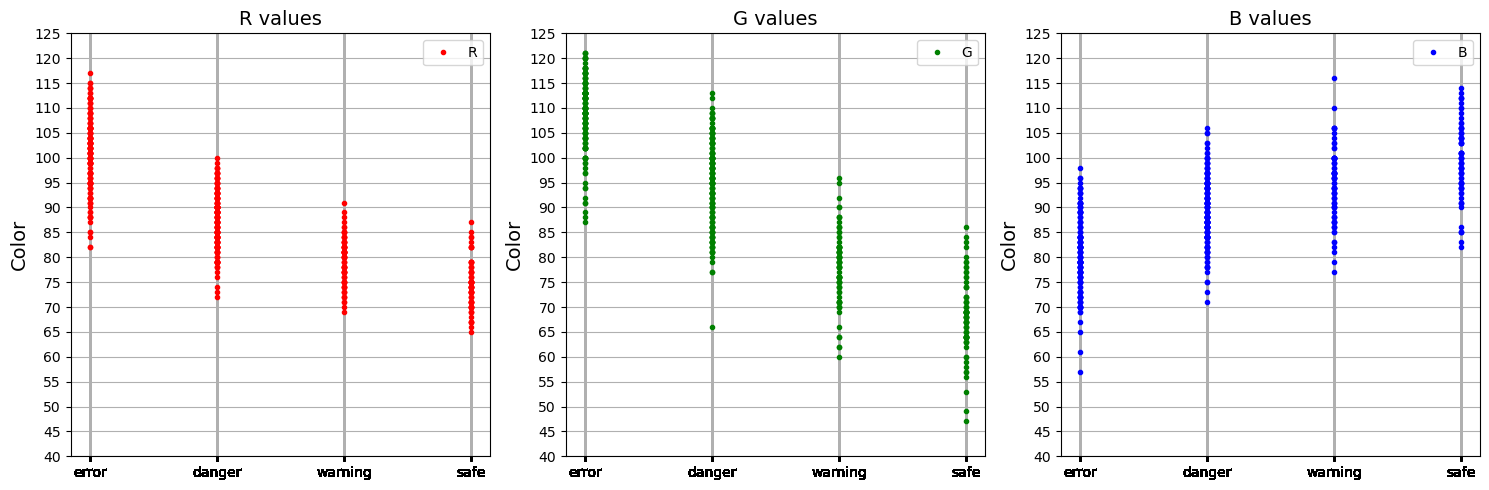

In [16]:
import matplotlib.pyplot as plt

# Plotting the RGB values
plt.figure(figsize=(15, 5))

# Plot for R values
plt.subplot(131)  # 1 row, 3 columns, plot in the first position
plt.plot(judge_values, R_values, marker='.', linestyle='', color='red', label='R')
plt.ylabel('Color', fontsize=14)
plt.title('R values', fontsize=14)
plt.grid(True)
plt.xticks(judge_values)
plt.yticks(range(40, 130, 5))
plt.legend()

# Plot for G values
plt.subplot(132)  # 1 row, 3 columns, plot in the second position
plt.plot(judge_values, G_values, marker='.', linestyle='', color='green', label='G')
plt.ylabel('Color', fontsize=14)
plt.title('G values', fontsize=14)
plt.grid(True)
plt.xticks(judge_values)
plt.yticks(range(40, 130, 5))
plt.legend()

# Plot for B values
plt.subplot(133)  # 1 row, 3 columns, plot in the third position
plt.plot(judge_values, B_values, marker='.', linestyle='', color='blue', label='B')
plt.ylabel('Color', fontsize=14)
plt.title('B values', fontsize=14)
plt.grid(True)
plt.xticks(judge_values)
plt.yticks(range(40, 130, 5))
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Save the plot
output_filename = "output.png"
output_filepath = os.path.join(folder_path, output_filename)
plt.savefig(output_filepath)
plt.show()


### 결정경계 시각화 

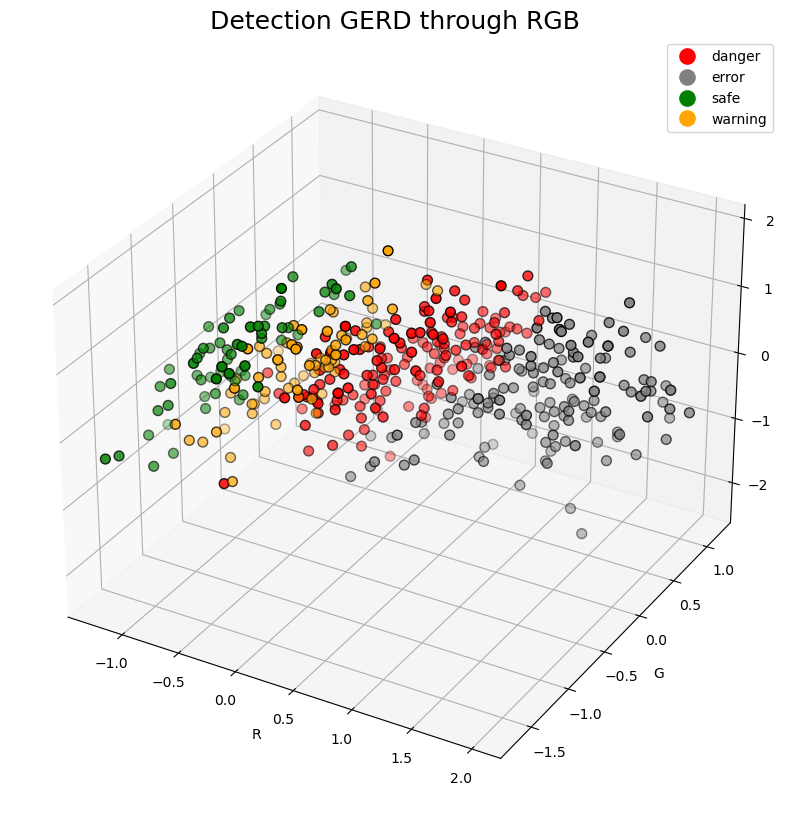

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import numpy as np

X_all = np.vstack([X_train_robust, X_valid_robust, X_test_robust])
#X_all = np.vstack([X_train, X_valid, X_test])
y_all = np.concatenate([y_train, y_valid, y_test])

# LabelEncoder를 사용하여 클래스 레이블을 숫자로 변환
le = LabelEncoder()
y_encoded = le.fit_transform(y_all)

# 3D 플로팅을 위한 RGB 색상값 선택
rgb_colors = X_all[:, :3]

# 3D 플로팅 설정
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 사용자 정의 컬러맵 정의
custom_cmap = {'danger': 'r', 'warning': 'orange', 'safe': 'g', 'error': 'gray'}
legend_labels = le.inverse_transform(list(set(y_encoded)))
# 결정 경계 플로팅
for label in legend_labels:
    # 색상을 지정하여 점 플로팅
    scatter = ax.scatter(rgb_colors[y_encoded == le.transform([label])[0], 0],
                         rgb_colors[y_encoded == le.transform([label])[0], 1],
                         rgb_colors[y_encoded == le.transform([label])[0], 2],
                         label=label, c=custom_cmap[label],edgecolors='black', s=50)

# 클래스 레이블을 숫자로 변환한 것을 해독하여 색상 막대 추가
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_cmap[label], markersize=13) for label in legend_labels]
ax.legend(handles=legend_handles)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax.set_title('Detection GERD through RGB',fontsize=18)
ax.view_init(elev=0, azim=180)  # Adjust the elev and azim values as needed
# Save the plot
output_filename = "3D_Decision_Boundary.jpg"
output_filepath = os.path.join(folder_path, output_filename)
plt.savefig(output_filepath)
# 플로팅 표시
plt.show()


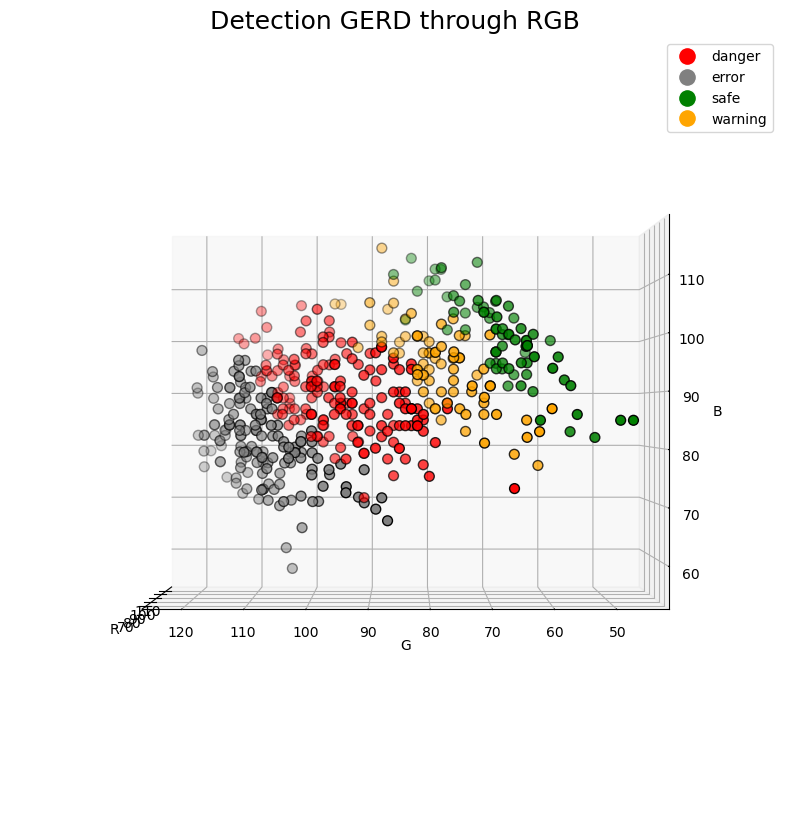

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import numpy as np

#X_all = np.vstack([X_train_robust, X_valid_robust, X_test_robust])
X_all = np.vstack([X_train, X_valid, X_test])
y_all = np.concatenate([y_train, y_valid, y_test])

# LabelEncoder를 사용하여 클래스 레이블을 숫자로 변환
le = LabelEncoder()
y_encoded = le.fit_transform(y_all)

# 3D 플로팅을 위한 RGB 색상값 선택
rgb_colors = X_all[:, :3]

# 3D 플로팅 설정
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 사용자 정의 컬러맵 정의
custom_cmap = {'danger': 'r', 'warning': 'orange', 'safe': 'g', 'error': 'gray'}
legend_labels = le.inverse_transform(list(set(y_encoded)))
# 결정 경계 플로팅
for label in legend_labels:
    # 색상을 지정하여 점 플로팅
    scatter = ax.scatter(rgb_colors[y_encoded == le.transform([label])[0], 0],
                         rgb_colors[y_encoded == le.transform([label])[0], 1],
                         rgb_colors[y_encoded == le.transform([label])[0], 2],
                         label=label, c=custom_cmap[label],edgecolors='black', s=50)

# 클래스 레이블을 숫자로 변환한 것을 해독하여 색상 막대 추가
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=custom_cmap[label], markersize=13) for label in legend_labels]
ax.legend(handles=legend_handles)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax.set_title('Detection GERD through RGB',fontsize=18)
ax.view_init(elev=0, azim=180)  # Adjust the elev and azim values as needed
# Save the plot
output_filename = "3D_Decision_Boundary.jpg"
output_filepath = os.path.join(folder_path, output_filename)
plt.savefig(output_filepath)
# 플로팅 표시
plt.show()
